<a href="https://colab.research.google.com/github/Ridhichhabra2006/FUTURE_DS_03/blob/main/student_feedback_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Feedback Sentiment Analysis**
---
#### **Objective:**

To analyze student feedback and gain insights on satisfaction levels using:
* Sentiment Analyzer (Vader)
* Wordclouds
* Rating Distributions

#### **Key Tasks Covered:**
* Cleaning and pre-processing the student feedback dataset
* Generating synthetic comments based on course recommendation radings
* Performing sentiment analysis using VADER (NLTK)
* Visualizing Ratings and Sentiments using graphs and wordclouds
* Highlighting Key insights



# **Importing libraries and loading the dataset**
---

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/student-feedback-survey-responses")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-feedback-survey-responses


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from wordcloud import WordCloud

In [ ]:
df= pd.read_csv("/kaggle/input/student-feedback-survey-responses/student_feedback.csv")
print(df.columns.tolist())
df.head(20)

['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
5,5,832,7,2,7,8,3,5,1,4
6,6,772,9,3,5,2,10,3,8,1
7,7,961,9,8,7,4,4,3,3,10
8,8,814,6,5,8,6,4,4,7,9
9,9,863,5,9,4,7,9,4,4,5


In [ ]:
print(df.dtypes)

Unnamed: 0                                              int64
Student ID                                              int64
Well versed with the subject                            int64
Explains concepts in an understandable way              int64
Use of presentations                                    int64
Degree of difficulty of assignments                     int64
Solves doubts willingly                                 int64
Structuring of the course                               int64
Provides support for students going above and beyond    int64
Course recommendation based on relevance                int64
dtype: object


In [ ]:
df.shape

(1001, 10)

# **Cleaning the Dataset**
---

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=['Unnamed: 0', 'Student ID'], inplace=True, axis=1)

In [ ]:
df.rename(columns={'Provides support for students going above and beyond' : 'Provides Support' , 'Course recommendation based on relevance' : 'Course_Rec' ,'Structuring of the course' : 'Course Structure', 'Degree of difficulty of assignments': 'Assignment Difficulty', 'Explains concepts in an understandable way' :
                   'Explanation'}, inplace=True)

In [ ]:
df.head()

,Well versed with the subject,Explanation,Use of presentations,Assignment Difficulty,Solves doubts willingly,Course Structure,Provides Support,Course_Rec
0,5,2,7,6,9,2,1,8
1,6,5,8,6,2,1,2,9
2,7,7,6,5,4,2,3,1
3,9,6,7,1,5,9,4,6
4,8,10,8,4,6,6,9,9


# **Featue Creation**

Since we are trying to do a Sentiment Analysis and the provided dataset doesnot have any textual attributes, we will create a new attribute named **"Comments"**
in which will have random comments on the basis of Course recommendation attributes' ratings.

In [ ]:
df.Course_Rec.unique()

array([ 8,  9,  1,  6,  4, 10,  5,  2,  7,  3])

In [ ]:
def gen_comments(ratings):
    comments = {
        1: "Absolutely terrible experience. Wasted my time." ,
        2: "Very poor course.",
        3: "Not very useful, no depth.",
        4: "It was okay-ish",
        5: "Average course, could be better.",
        6: "Decent content",
        7: "Good course overall.",
        8:  "Very helpful and structed. Well explained as well",
        9: "Excellent course. Highly recommended.",
        10: "Perfectly designed and executed. One of the best courses I have ever taken."
         }

    return comments.get(int(ratings), "No comment.")

df['Comments'] = df['Course_Rec'].apply(gen_comments)
df.head()

,Well versed with the subject,Explanation,Use of presentations,Assignment Difficulty,Solves doubts willingly,Course Structure,Provides Support,Course_Rec,Comments
0,5,2,7,6,9,2,1,8,Very helpful and structed. Well explained as well
1,6,5,8,6,2,1,2,9,Excellent course. Highly recommended.
2,7,7,6,5,4,2,3,1,Absolutely terrible experience. Wasted my time.
3,9,6,7,1,5,9,4,6,Decent content
4,8,10,8,4,6,6,9,9,Excellent course. Highly recommended.


# Sentiment Analysis
---



In [ ]:
def get_vader_sentiment(comment):
    scores = sid.polarity_scores(comment)
    return scores['compound']

df['Sentiment_Compound'] = df['Comments'].apply(get_vader_sentiment)

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment_Compound'].apply(classify_sentiment)
df.head(20)

,Well versed with the subject,Explanation,Use of presentations,Assignment Difficulty,Solves doubts willingly,Course Structure,Provides Support,Course_Rec,Comments,Sentiment_Compound,Sentiment
0,5,2,7,6,9,2,1,8,Very helpful and structed. Well explained as well,0.7425,Positive
1,6,5,8,6,2,1,2,9,Excellent course. Highly recommended.,0.6997,Positive
2,7,7,6,5,4,2,3,1,Absolutely terrible experience. Wasted my time.,-0.7818,Negative
3,9,6,7,1,5,9,4,6,Decent content,0.0000,Neutral
4,8,10,8,4,6,6,9,9,Excellent course. Highly recommended.,0.6997,Positive
5,7,2,7,8,3,5,1,4,It was okay-ish,0.0000,Neutral
6,9,3,5,2,10,3,8,1,Absolutely terrible experience. Wasted my time.,-0.7818,Negative
7,9,8,7,4,4,3,3,10,Perfectly designed and executed. One of the be...,0.8555,Positive
8,6,5,8,6,4,4,7,9,Excellent course. Highly recommended.,0.6997,Positive
9,5,9,4,7,9,4,4,5,"Average course, could be better.",0.4404,Positive


**Visualizing Sentiments**

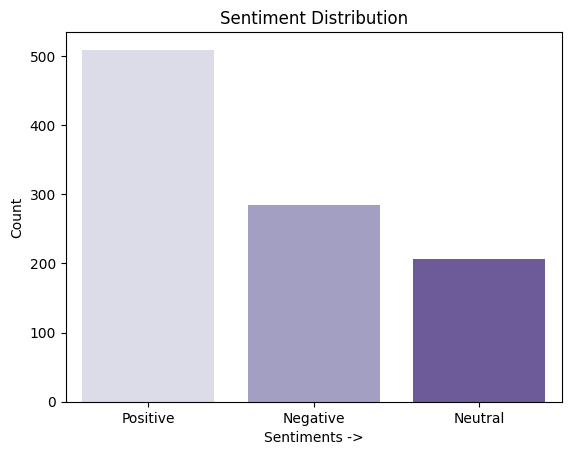

In [ ]:
sns.countplot(x= 'Sentiment', data=df , hue= 'Sentiment' , palette= 'Purples')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiments ->')
plt.ylabel('Count')
plt.show()

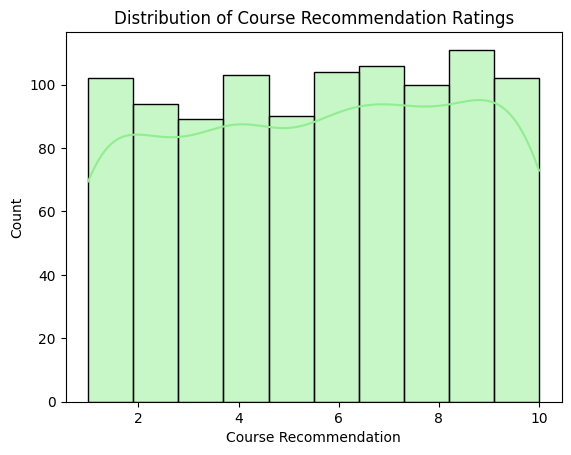

This shows the tone of ratings.


In [ ]:
sns.histplot(df['Course_Rec'],kde=True, bins=10, color='LightGreen')
plt.title('Distribution of Course Recommendation Ratings')
plt.xlabel('Course Recommendation')
plt.ylabel('Count')
plt.show()

print('This shows the tone of ratings.')

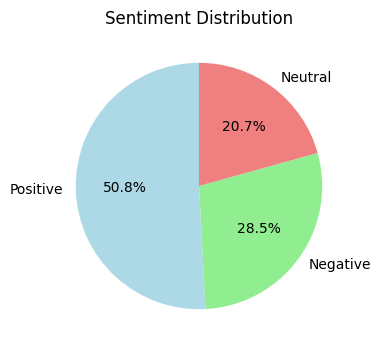

This shows the percentages of how much feedback is Positive/Negative.


In [ ]:
df['Sentiment'].value_counts().plot.pie(figsize=(8,4), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

print('This shows the percentages of how much feedback is Positive/Negative.')

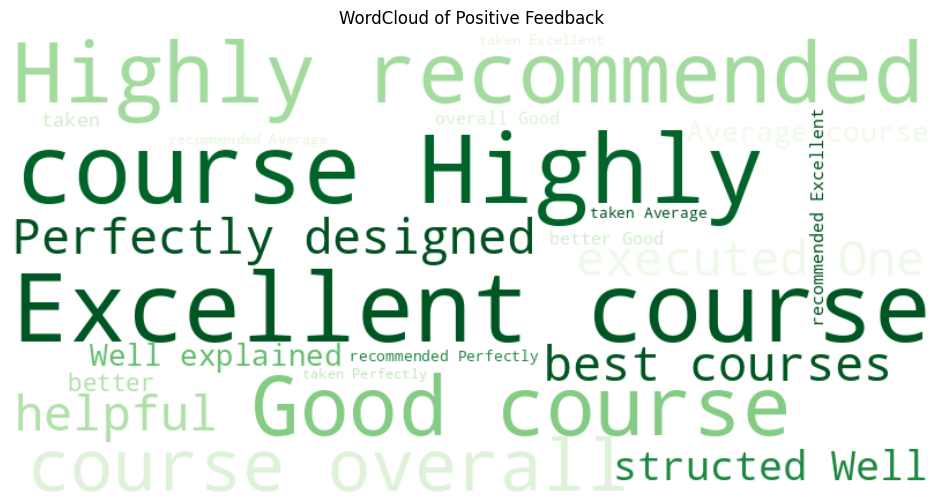

In [ ]:
from wordcloud import WordCloud

positive_comments = ' '.join(df[df['Sentiment'] == 'Positive']['Comments'])
negative_comments = ' '.join(df[df['Sentiment'] == 'Negative']['Comments'])

pos_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_comments)

plt.figure(figsize=(12,6))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Feedback')
plt.show()

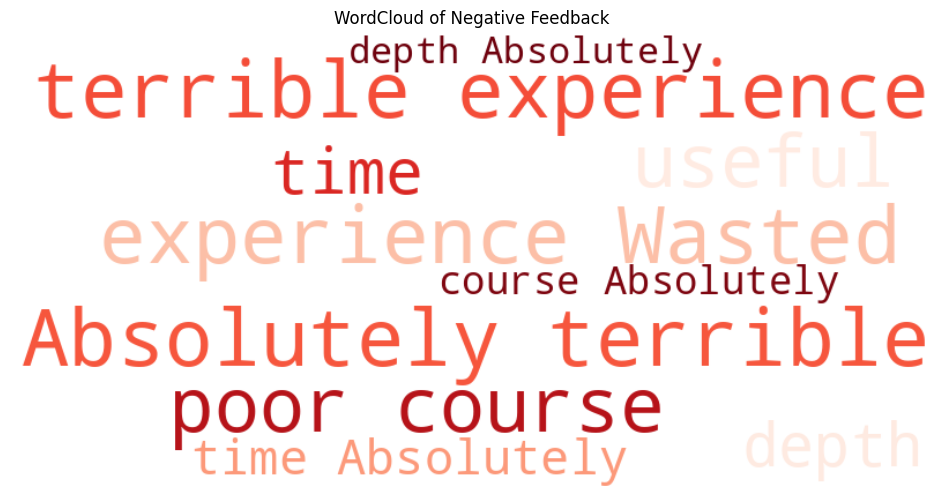

In [ ]:
neg_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_comments)

plt.figure(figsize=(12,6))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Negative Feedback')
plt.show()

# **Graphs of Ratings of different Columns**
---

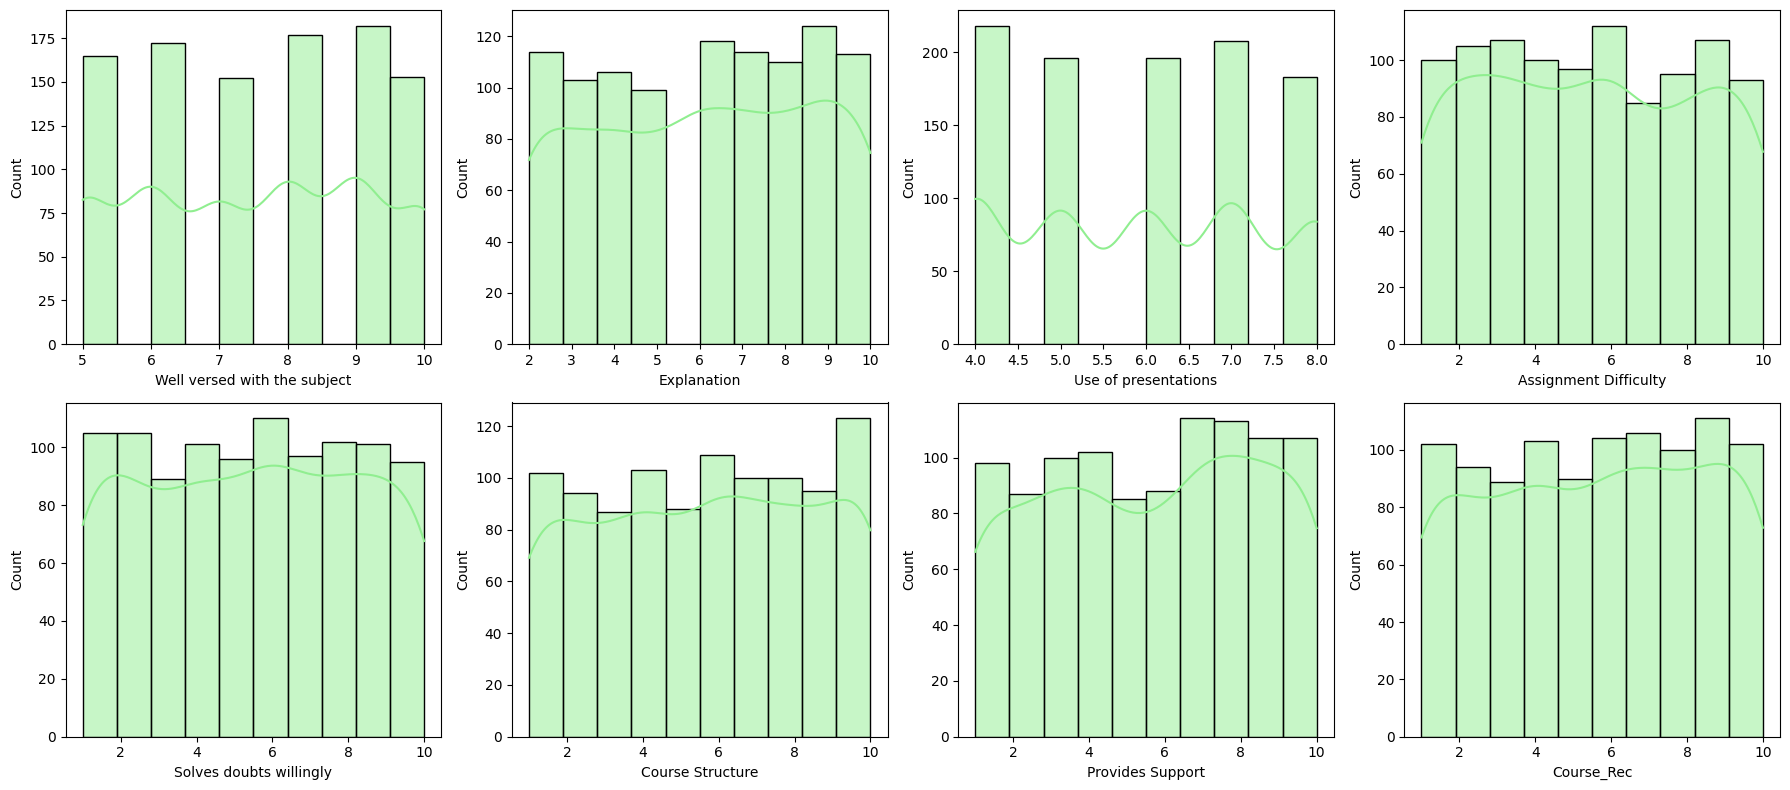

In [ ]:
rating_col = [col for col in df.columns
              if col not in ['Comments', 'Sentiment', 'Sentiment_Compound'] ]
num_cols = len(rating_col)
rows = (num_cols + 2) // 4

fig, axes = plt.subplots(rows, 4, figsize=(18, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(rating_col):
    sns.histplot(df[col], kde=True, bins=10, color='LightGreen', ax=axes[i])
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# **Key Insights from Sentiment Visualizations:**
---


1.   Majority of students rated the course between **7-9** indicating that most of the people who took the course are **satisfied** with their learning experience.
2.   Low ratings are often linked with **Negative sentiments.**
3.   Majority of feedback falls under **Positive sentiments.**
4.   Wordcloud suggests that students value **Structure and clarity.**
5.   There is a room for improvement in **Student Experience and Depth of the course.**

